In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
df = pd.read_csv('../data/moonson_barat/1990.csv', delimiter=',', header=0)

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)
    print('\n\n\n\nJumlah data : ',len(df))

     Posisi_LS   Posisi_BT  Yellowfin  Bigeye  Albacore
0   -13.566667  117.200000          2       3         1
1   -12.966667  118.500000          0       5         0
2   -13.550000  117.650000          0       9         0
3   -13.866667  117.766667          0       9         4
4   -13.300000  117.516667          1      10         2
5   -13.233333  117.683333          0       7         0
6   -12.950000  117.283333          2       4         0
7   -12.500000  117.750000          1       1         1
8   -11.883333  111.000000          0       2         0
9   -11.066667  110.366667          0      15         0
10  -11.216667  110.300000          1       5         0
11  -11.483333  110.983333          3       1         0
12  -10.516667  124.283333          3       0         0
13  -10.116667  124.900000          3      15         0
14  -10.116667  124.966667          6       4         0
15  -10.433333  122.916667          2       0         0
16  -10.583333  123.833333          2       0   

In [3]:
# Generate some clusters!
# n_clusters = 50
# clusters_x, clusters_y = cluster_gen(n_clusters)

# # Convert to a single dataset in OpenCV format
# data = np.float32((np.concatenate(clusters_x), np.concatenate(clusters_y))).transpose()

data=df

X = StandardScaler().fit_transform(data)

# Define max_distance (eps parameter in DBSCAN())
db = DBSCAN(eps=1.5, min_samples=5).fit(data)

# Extract a mask of core cluster members
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Extract labels (-1 is used for outliers)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_cluster = n_clusters + 1
unique_labels = set(labels)
n_noise_ = list(labels).count(-1)

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [4]:
print('Estimated number of clusters: %d' % n_clusters)
print('Total Data : ', len(data))
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 4
Total Data :  501
Estimated number of noise points: 340
Silhouette Coefficient: -0.301


Text(0.5, 1.0, 'Original Data')

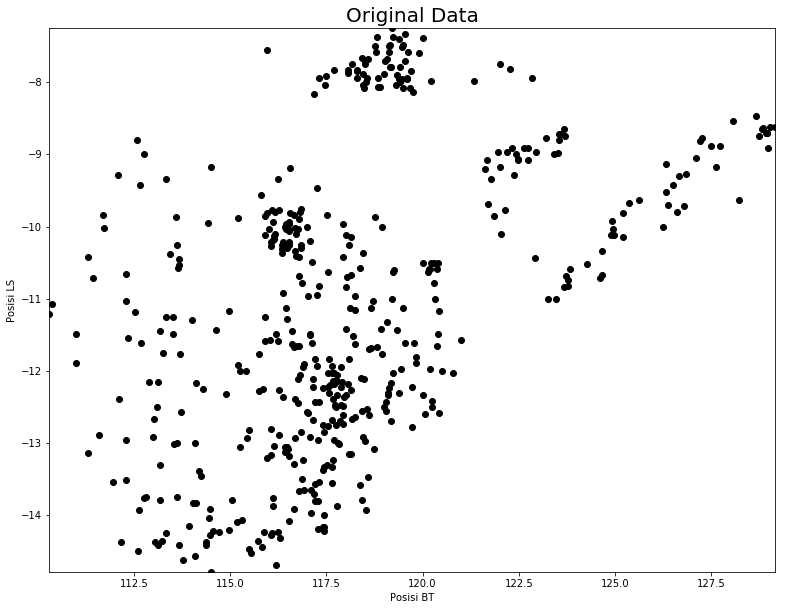

In [5]:
%matplotlib inline
# Plot up the results!
min_x = np.min(data['Posisi_BT'])
max_x = np.max(data['Posisi_BT'])
min_y = np.min(data['Posisi_LS'])
max_y = np.max(data['Posisi_LS'])

fig = plt.figure(figsize=(13,10))
plt.plot(data['Posisi_BT'], data['Posisi_LS'], 'ko')
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.ylabel('Posisi LS')
plt.xlabel('Posisi BT')
plt.title('Original Data', fontsize = 20)

<IPython.core.display.Javascript object>


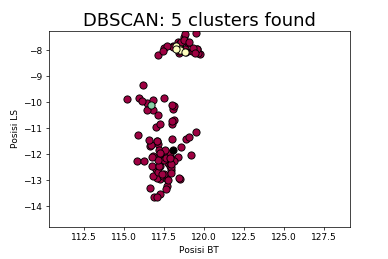


      Posisi_LS   Posisi_BT  Yellowfin  Bigeye  Albacore
1   -12.966667  118.500000          0       5         0
5   -13.233333  117.683333          0       7         0
6   -12.950000  117.283333          2       4         0
21  -11.416667  118.916667          1       2         0
23  -13.650000  116.916667          0       5         0
44  -12.116667  117.150000          1       5         0
45  -12.166667  117.666667          1       9         0
47  -12.183333  117.700000          1       9         0
48  -12.033333  117.650000          1       7         0
49  -12.033333  117.700000          1       9         0
50  -11.616667  117.116667          0       2         0
53  -13.333333  117.633333          1       2         0
59  -12.250000  115.850000          1       2         0
63  -12.583333  117.016667          0       6         0
64  -12.050000  116.816667          1       3         0
65  -12.433333  117.300000          0       8         0
66  -11.666667  116.666667          0       2 

In [7]:
%matplotlib notebook
# plt.subplt(122)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == 1:
        # block used noise.
        col = [0, 0, 0, 1]
        
    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    plt.plot(xy['Posisi_BT'], xy['Posisi_LS'], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)
    print('\n', xy,'\nMember of Cluster : ', len(xy))

    #xy = data[class_member_mask & ~core_samples_mask]
    #plt.plot(xy['Posisi_BT'], xy['Posisi_LS'], 'o', markerfacecolor=tuple(col),
             #markeredgecolor='k', markersize=3)
    
# Plot up the results!
# min_x = np.min(data['Posisi_BT'])
# max_x = np.max(data['Posisi_BT'])
# min_y = np.min(data['Posisi_LS'])
# max_y = np.max(data['Posisi_LS'])
plt.xlim(min_x, max_x)
plt.ylim(min_y, max_y)
plt.ylabel('Posisi LS')
plt.xlabel('Posisi BT')
plt.title('DBSCAN: %d clusters found' % n_cluster, fontsize = 20)
fig.tight_layout()
plt.show()